In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import glob
from imblearn.over_sampling import SMOTE


In [55]:
# master_df=pd.read_csv("/content/BlazePose_Data.csv")
master_df=pd.DataFrame()
lst_blz=glob.glob("/content/Blaze*")
for i in lst_blz:
  # print(i)
  temp_df=pd.read_csv(i)
  # print(temp_df.shape)
  master_df=master_df.append(temp_df)
master_df = master_df.loc[:, ~master_df.columns.str.contains('^Unnamed')]
print(master_df.shape)
master_df.head()

(3567, 7)


<ipython-input-55-34be1f417c59>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df=master_df.append(temp_df)


,Video_path,Frame_number,shoulder_distance,elbow_distance,shoulder_angle,arm_to_height_ratio,Person_number
0,/content/Anomaly_Videos/Assault/Assault013_x26...,51,0.825352,1.380282,-2.921909,-12.669692,5
1,/content/Anomaly_Videos/Assault/Assault013_x26...,81,0.233416,0.159275,3.090152,-11.746744,2
2,/content/Anomaly_Videos/Assault/Assault013_x26...,111,0.917443,1.149235,-3.083697,-30.507757,2
3,/content/Anomaly_Videos/Assault/Assault013_x26...,141,0.108606,0.059077,-3.065977,1.073312,3
4,/content/Anomaly_Videos/Assault/Assault013_x26...,201,0.321555,0.125002,3.041822,2.429184,3


In [56]:
label=[]
for i in range(master_df.shape[0]):
  # print(i)
  strx=master_df.iloc[i]["Video_path"]
  # print(strx)
  if "Abuse" in strx:
    label.append("Abuse")
  elif "Arrest" in strx:
    label.append("Arrest")
  elif "Arson" in strx:
    label.append("Arson")#
  elif "Assult" in strx:
    label.append("Assult")#
  elif "Burglary" in strx:
    label.append("Burglary")
  elif "Fighting" in strx:
    label.append("Fighting")
  elif "Normal" in strx:
    label.append("Normal")
  elif "Robbery" in strx:
    label.append("Robbery")
  elif "Shooting" in strx:
    label.append("Shooting")
  elif "Shoplifting" in strx:
    label.append("Shoplifting")
  elif "Stealing" in strx:
    label.append("Stealing")#
  elif "Vandalism" in strx:
    label.append("Vandalism")
  else:
    label.append("Unknown")
master_df["Activity_Recognition_Label"]=label


In [57]:
master_df=master_df[~master_df["Activity_Recognition_Label"].isin(["Unknown"])]
master_df["Activity_Recognition_Label"].value_counts()

Burglary       996
Fighting       771
Arrest         441
Shoplifting    284
Robbery        207
Abuse          155
Normal         124
Stealing        83
Vandalism       77
Shooting        36
Arson           24
Name: Activity_Recognition_Label, dtype: int64

In [58]:
master_df=master_df.drop(['Video_path'], axis=1)
susp_label=[]
for i in range(master_df.shape[0]):
  # print(i)
  strx=master_df.iloc[i]["Activity_Recognition_Label"]
  if "Normal" in strx:
    susp_label.append("Normal")
  else:
    susp_label.append("Suspicious")

In [59]:
master_df["Activity_Label"]=susp_label

In [60]:
master_df.head()

,Frame_number,shoulder_distance,elbow_distance,shoulder_angle,arm_to_height_ratio,Person_number,Activity_Recognition_Label,Activity_Label
240,136,0.019738,0.058205,-2.675520,2.696296,1,Vandalism,Suspicious
241,166,0.244076,0.222307,-2.869226,-4.649397,1,Vandalism,Suspicious
242,196,0.259568,0.347421,-3.024840,-19.161695,1,Vandalism,Suspicious
243,826,0.041568,0.080042,-2.548320,-5.685189,1,Vandalism,Suspicious
244,1036,0.285964,0.503714,-1.767956,-3.042181,1,Vandalism,Suspicious


# Detecting if the activity is suspicious or not

In [61]:
features=['shoulder_distance', 'elbow_distance', 'shoulder_angle',
       'arm_to_height_ratio', 'Person_number']

In [62]:
le = LabelEncoder()
master_df['Activity_Label'] = le.fit_transform(master_df['Activity_Label'])
X = master_df.drop('Activity_Label', axis=1)[features].values
Y = master_df['Activity_Label'].values

In [63]:
master_df['Activity_Label'].value_counts()

1    3074
0     124
Name: Activity_Label, dtype: int64

In [64]:
num_classes=len(master_df["Activity_Label"].unique())
num_classes

2

In [65]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X,Y = smote.fit_resample(X, Y)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardize features using z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2558, 5) (640, 5) (2558,) (640,)


In [67]:
np.unique(y_test)

array([0, 1])

In [70]:
np.unique(y_test)

array([0, 1])

# Build DNN Model

In [ ]:

# Build the DNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    # tf.keras.layers.Input(shape=(X_train_scaled_reshaped.shape[0],X_test_scaled_reshaped.shape[1])),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.1)
history=model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
308/308 [==============================] - 3s 6ms/step - loss: 0.4358 - accuracy: 0.8008 - val_loss: 0.4854 - val_accuracy: 0.7672
Epoch 2/5
308/308 [==============================] - 2s 6ms/step - loss: 0.3879 - accuracy: 0.8264 - val_loss: 0.5062 - val_accuracy: 0.7594
Epoch 3/5
308/308 [==============================] - 2s 6ms/step - loss: 0.3580 - accuracy: 0.8410 - val_loss: 0.5239 - val_accuracy: 0.7500
Epoch 4/5
308/308 [==============================] - 3s 8ms/step - loss: 0.3441 - accuracy: 0.8522 - val_loss: 0.4610 - val_accuracy: 0.8125
Epoch 5/5
308/308 [==============================] - 2s 6ms/step - loss: 0.3260 - accuracy: 0.8595 - val_loss: 0.6357 - val_accuracy: 0.8000


In [ ]:
# y_pred

In [ ]:
# Make predictions
predicted_probabilities = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
threshold = 0.5
y_pred_classes = (predicted_probabilities > threshold).astype(int)

# print("Predicted Binary:", y_pred_classes)
# Decode integer labels back to original species labels
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred_classes)
print(classification_report(y_pred_original, y_test_original))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

      Normal       0.79      0.15      0.26       144
  Suspicious       0.80      0.99      0.88       496

    accuracy                           0.80       640
   macro avg       0.79      0.57      0.57       640
weighted avg       0.80      0.80      0.74       640



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


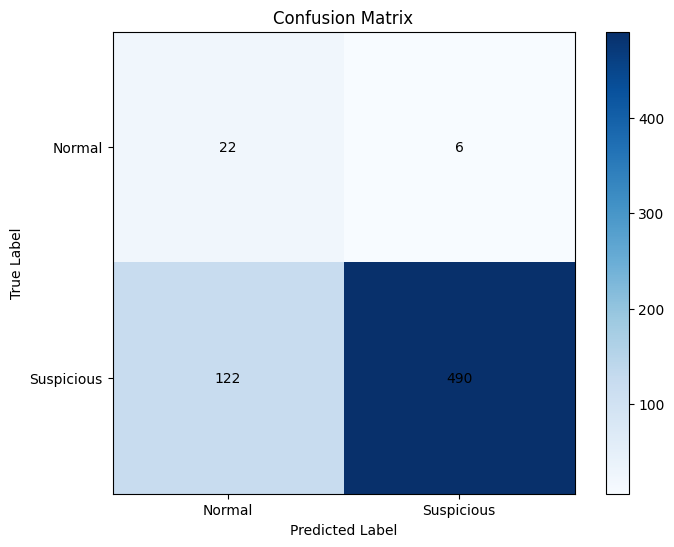

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test_original, y_pred_original)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Suspicious']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center")

plt.show()

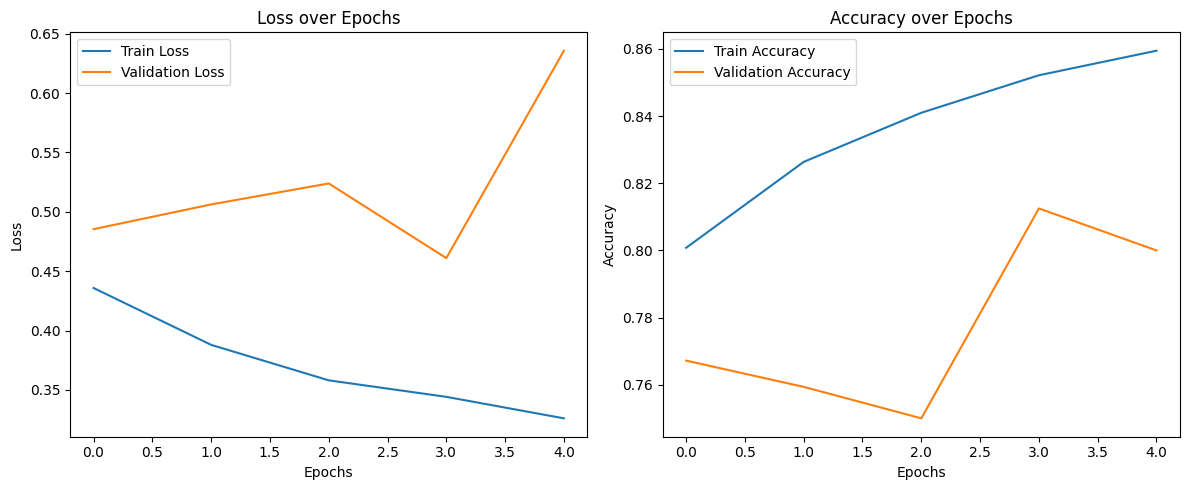

In [ ]:
import matplotlib.pyplot as plt

# Get loss and accuracy values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss
ax1.plot(train_loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Epochs')
ax1.legend()

# Plot accuracy
ax2.plot(train_accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.legend()

plt.tight_layout()
plt.show()


# Build XGB

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best Accuracy: 0.915625


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.64      0.40        28
           1       0.98      0.93      0.95       612

    accuracy                           0.92       640
   macro avg       0.64      0.79      0.68       640
weighted avg       0.95      0.92      0.93       640



In [ ]:
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)
print(classification_report(y_test_original, y_pred_original))

              precision    recall  f1-score   support

      Normal       0.29      0.64      0.40        28
  Suspicious       0.98      0.93      0.95       612

    accuracy                           0.92       640
   macro avg       0.64      0.79      0.68       640
weighted avg       0.95      0.92      0.93       640



# Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [72]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9534945344665956
Test Accuracy: 0.925


In [73]:
# Predict using the best estimator
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.32      0.64      0.43        28
           1       0.98      0.94      0.96       612

    accuracy                           0.93       640
   macro avg       0.65      0.79      0.69       640
weighted avg       0.95      0.93      0.94       640



In [74]:
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)
print(classification_report(y_test_original, y_pred_original))

              precision    recall  f1-score   support

      Normal       0.32      0.64      0.43        28
  Suspicious       0.98      0.94      0.96       612

    accuracy                           0.93       640
   macro avg       0.65      0.79      0.69       640
weighted avg       0.95      0.93      0.94       640



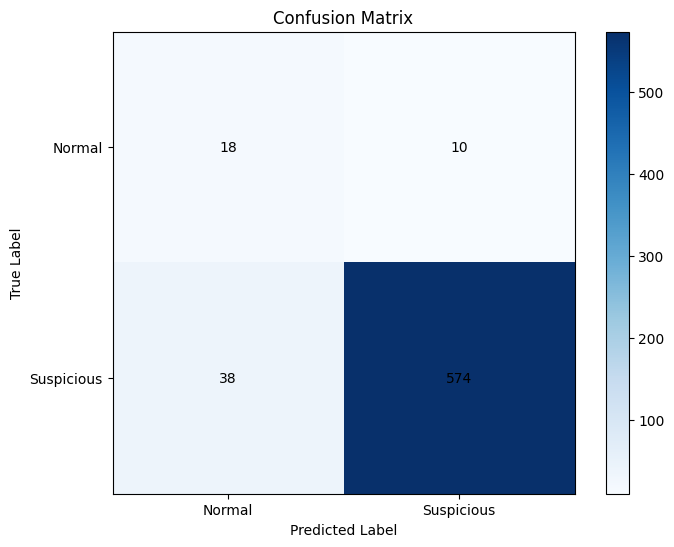

In [75]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test_original, y_pred_original)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Suspicious']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center")

plt.show()

In [76]:
import pickle
filename='rf_final_2.pkl'
pickle.dump(best_model,open(filename,'wb'))

# LightGBM

In [ ]:
import lightgbm as lgb


In [ ]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Predict using the best estimator
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 20}
              precision    recall  f1-score   support

           0       0.30      0.68      0.42        28
           1       0.98      0.93      0.96       612

    accuracy                           0.92       640
   macro avg       0.64      0.80      0.69       640
weighted avg       0.95      0.92      0.93       640



In [ ]:
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)
print(classification_report(y_test_original, y_pred_original))

              precision    recall  f1-score   support

      Normal       0.30      0.68      0.42        28
  Suspicious       0.98      0.93      0.96       612

    accuracy                           0.92       640
   macro avg       0.64      0.80      0.69       640
weighted avg       0.95      0.92      0.93       640



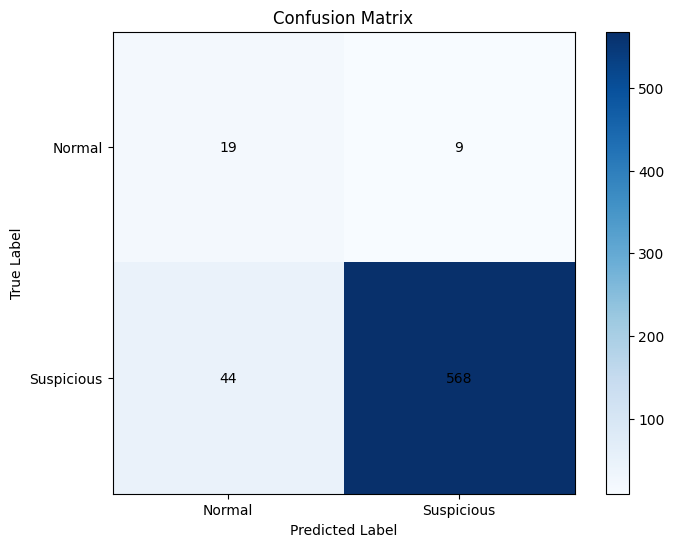

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test_original, y_pred_original)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Suspicious']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center")

plt.show()